In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
plt.style.use('seaborn')
sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.options.mode.chained_assignment = None # Warning for chained copies disabled

def msv1(data, thresh=20, color='black', edgecolor='black', width=15, height=3):
    """"""
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold',         color='crimson',ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold',          color='blue',ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage', weight='bold')
    plt.yticks(weight ='bold')
    
    return plt.show()


data = pd.read_csv("/home/apprenant/simplon_project/food_facts/data/foodfacts.tsv",delimiter='\t',encoding='utf-8', low_memory= False)

pd.options.mode.chained_assignment = None



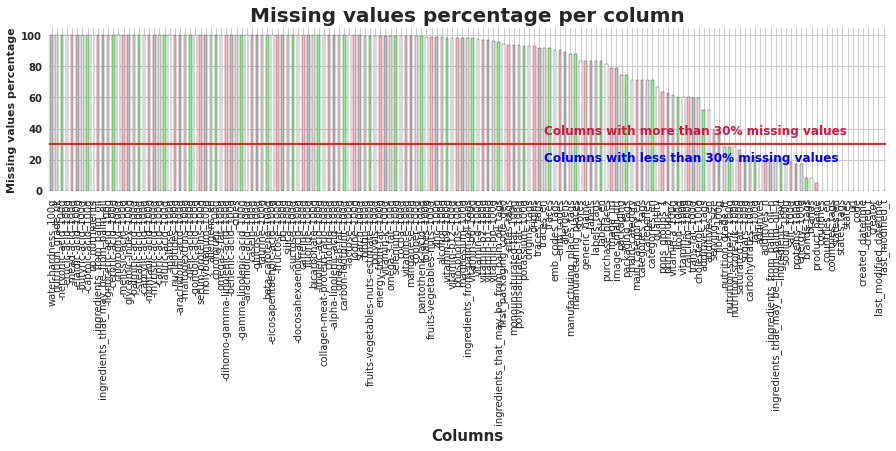

In [8]:
msv1(data,30, color=('silver', 'gainsboro', 'lightgreen', 'white', 'lightpink'))

Ici on peut voir que le jeu de données est tres incomplet , une grande partie des colonnes sont entierement vides ou le taux de valeur manquante est élevé

on a travailler avec une partie des données , elle sont netoyés maintenant on va les visualisé

In [18]:
df = pd.read_csv("/home/apprenant/simplon_project/food_facts/data/df_clean.csv" ,low_memory= False, sep=',')

In [19]:
df.head()


,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,France,NaN,NaN,NaN,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...",NaN,0.00,0.00,0.0,0.00,0.00000,0.0
1,France,Curcuma moulu,0.0,[ curcuma-moulu -> fr:curcuma-moulu ] [ cur...,0.0,0.0,NaN,"en:to-be-checked, en:complete, en:nutrition-fa...",NaN,0.00,0.00,0.0,0.00,0.00000,0.0
2,en:FR,NaN,NaN,NaN,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...",NaN,0.00,0.00,0.0,0.00,0.00000,0.0
3,US,"Cashew, wheat flour, modified starch(acetylate...",2.0,[ cashew -> en:cashew ] [ wheat-flour -> en...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...",2284.0,33.33,5.26,3.5,14.04,1.14046,15.0
4,spain,NaN,NaN,NaN,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...",NaN,0.00,0.00,0.0,0.00,0.00000,0.0


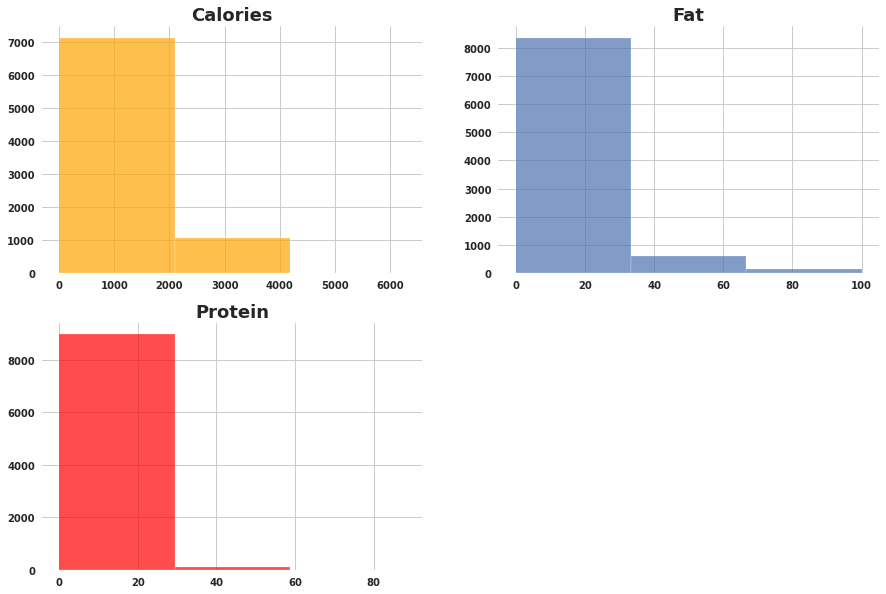

In [21]:
plt.style.use('seaborn')
sns.set_style('whitegrid')

fig= plt.figure(figsize=(15,10))
#2 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
plt.hist(df.energy_100g, bins=3, color='orange', alpha=0.7)
plt.title('Calories',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')
#first row sec col
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.hist(df.fat_100g, bins=3, alpha=0.7)
plt.title('Fat',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')
#Second row first column
ax1 = plt.subplot2grid((2,2), (1, 0))
plt.hist(df.proteins_100g, bins=3, color='red', alpha=0.7)
plt.title('Protein',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')

plt.show()


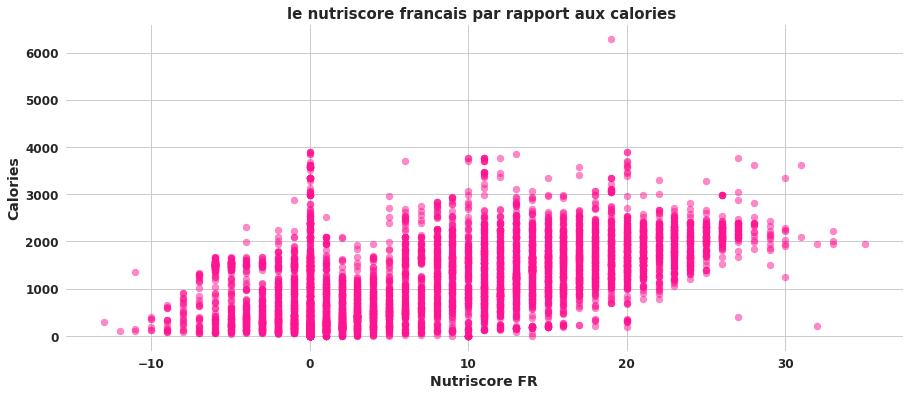

In [28]:
plt.figure(figsize=(15, 6))

plt.scatter(x=df['nutrition-score-fr_100g'], y=df['energy_100g'], color='deeppink', alpha=0.5)
plt.title("le nutriscore francais par rapport aux calories ", 
          weight='bold', 
          fontsize=15)
plt.xlabel('Nutriscore FR', weight='bold', fontsize=14)
plt.ylabel('Calories', weight='bold', fontsize=14)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12,weight='bold')


plt.show()